In [3]:
%pip install numpy
%pip install pandas
%pip install scipy
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
    --------------------------------------- 0.2/9.2 MB 3.1 MB/s eta 0:00:03
   -- ------------------------------------- 0.6/9.2 MB 6.4 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/9.2 MB 8.9 MB/s eta 0:00:01
   ------- -------------------------------- 1.7/9.2 MB 8.9 MB/s eta 0:00:01
   --------- ------------------------------ 2.2/9.2 MB 9.5 MB/s eta 0:00:01
   ------------ --------------------------- 2.9/9.2 MB 10.3 MB/s eta 0:00:01
   --------------- ------------------------ 3.6/9.2 MB 11.0 MB/s eta 0:00:01
   ------------------- -------------------- 4.5/9.2 MB 11.9 MB/s eta 0:00:01
   ----------------------- ---------------- 5.4/9.2 MB 1

In [1]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings("ignore")

In [3]:
stream_path = ('spotify-2023.csv')
streams = pd.read_csv(
    stream_path,
    quotechar='"',
    encoding = 'ISO-8859-1',
    thousands=','
    )

# Supervised learning excercise

Dataset of interest: Spotify streaming data  
Source: [Kaggle.com](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023?resource=download)  
Goal: The goal is to attempt to model streams from the underlying features of a song. This will be done in hopes of creating music that will be more commercially popular than average.  
Description (from source): 
>This dataset contains a comprehensive list of the most famous songs of 2023 as listed on Spotify. The dataset offers a wealth of features beyond what is typically available in similar datasets. It provides insights into each song's attributes, popularity, and presence on various music platforms. The dataset includes information such as track name, artist(s) name, release date, Spotify playlists and charts, streaming statistics, Apple Music presence, Deezer presence, Shazam charts, and various audio features.  

Further description of columns in dataset:  
- track_name: Name of the song  
- artist(s)_name: Name of the artist(s) of the song  
- artist_count: Number of artists contributing to the song  
- released_year: Year when the song was released  
- released_month: Month when the song was released  
- released_day: Day of the month when the song was released  
- in_spotify_playlists: Number of Spotify playlists the song is included in  
- in_spotify_charts: Presence and rank of the song on Spotify charts  
- streams: Total number of streams on Spotify  
- in_apple_playlists: Number of Apple Music playlists the song is included in  
- in_apple_charts: Presence and rank of the song on Apple Music charts  
- in_deezer_playlists: Number of Deezer playlists the song is included in  
- in_deezer_charts: Presence and rank of the song on Deezer charts  
- in_shazam_charts: Presence and rank of the song on Shazam charts  
- bpm: Beats per minute, a measure of song tempo  
- key: Key of the song  
- mode: Mode of the song (major or minor)
- danceability_%: Percentage indicating how suitable the song is for dancing  
- valence_%: Positivity of the song's musical content  
- energy_%: Perceived energy level of the song  
- acousticness_%: Amount of acoustic sound in the song  
- instrumentalness_%: Amount of instrumental content in the song  
- liveness_%: Presence of live performance elements  
- speechiness_%: Amount of spoken words in the song  

### Lets begin by removing nulls and data that doesnt make sense. Here we can assume streams should be a number, therefore we drop rows with a non-numeric value for streams. It turns out there is a problem with a corrupted row in the file.

In [4]:
print(streams[~streams['streams'].str.isnumeric()]['streams'])
streams.iloc[574:, :]

574    BPM110KeyAModeMajorDanceability53Valence75Ener...
Name: streams, dtype: object


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,...,110,A,Major,53,75,69,7,0,17,3
575,LA FAMA (with The Weeknd),"The Weeknd, ROSALï¿½",2,2021,11,11,4640,3,374706940,81,...,136,NaN,Minor,77,82,30,95,0,13,5
576,The Family Madrigal,"Olga Merediz, Stephanie Beatriz, Encanto - Cast",3,2021,11,19,1150,0,184937148,20,...,141,C#,Major,59,56,63,12,0,6,36
577,Phantom Regret by Jim,The Weeknd,1,2022,1,7,768,0,31959571,1,...,108,A,Minor,46,23,48,75,30,14,4
578,Dos Oruguitas,Sebastian Yatra,1,2021,11,19,925,0,167076418,24,...,94,NaN,Major,42,47,36,76,0,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


### It looks like this row does not impact the rows after. (i.e. It isnt a csv problem where the columns shift due to something like a missing comma).  
### It also looks like the data in the streams column is repeated correctly in the following columns. Lets drop the row that is missing our target variable.

In [5]:
print(f'Rows prior to removing nulls: {len(streams)}')

streams.isnull().sum()
# about 10% of 'key' column is null
# also 5% of the key column
data_non_null = streams.dropna()

print(f'Rows after removing nulls: {len(data_non_null)}')

data_non_null = data_non_null[data_non_null['streams'].str.isnumeric()]

print(f'Rows after removing non numeric stream rows: {len(data_non_null)}')

Rows prior to removing nulls: 953
Rows after removing nulls: 817
Rows after removing non numeric stream rows: 816


### After further exploration, it looks like we have to turn the streams column into a numeric column, lets take care of that right now.

In [6]:
data_non_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            816 non-null    object 
 1   artist(s)_name        816 non-null    object 
 2   artist_count          816 non-null    int64  
 3   released_year         816 non-null    int64  
 4   released_month        816 non-null    int64  
 5   released_day          816 non-null    int64  
 6   in_spotify_playlists  816 non-null    int64  
 7   in_spotify_charts     816 non-null    int64  
 8   streams               816 non-null    object 
 9   in_apple_playlists    816 non-null    int64  
 10  in_apple_charts       816 non-null    int64  
 11  in_deezer_playlists   816 non-null    int64  
 12  in_deezer_charts      816 non-null    int64  
 13  in_shazam_charts      816 non-null    float64
 14  bpm                   816 non-null    int64  
 15  key                   816 no

In [7]:
data_non_null = data_non_null.astype(
    {
        'streams':'int64',
        'in_shazam_charts':int
    }
)

### Looks like the preliminary data-cleaning is complete. Columns are showing expected numbers, with expected data types. Time to go deeper and see if the data is fit for statistical tests.

## Normal distribution for target variable  
We can work on making the target variable as close to a normal distribution as possible

Text(0.5, 1.0, 'Streams Distribution')

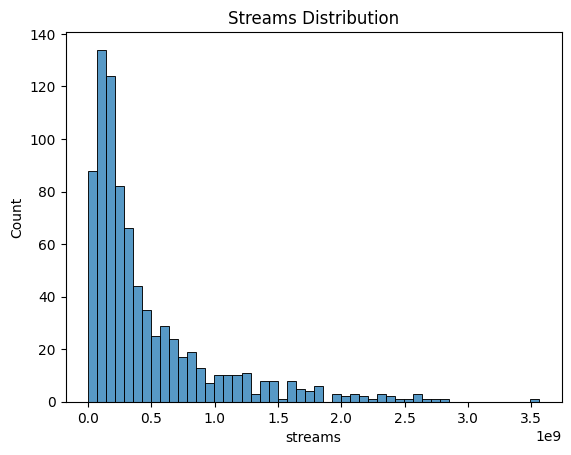

In [8]:
sns.histplot(data_non_null['streams'], bins=50).set_title('Streams Distribution')

This looks heavily skewed, taking the log of the target variable can fix this.

Text(0.5, 1.0, 'Distribution of Log Streams')

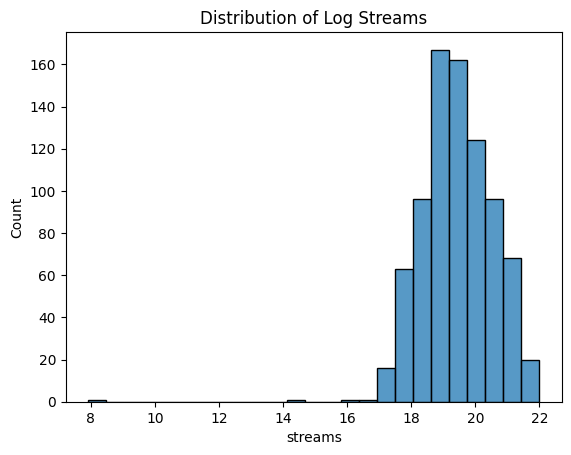

In [9]:
sns.histplot(np.log(data_non_null['streams']), bins=25).set_title('Distribution of Log Streams')

In [10]:
data_non_null.loc[:, 'streams'] = data_non_null.loc[:, 'streams'].apply(np.log)

Much better, now we can take care of the outliers on the lower end.

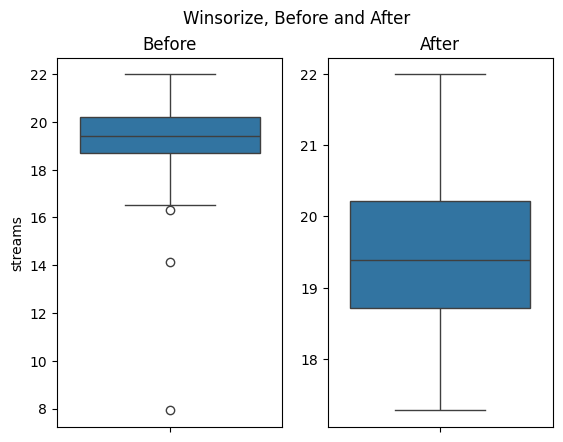

In [11]:
fig, ax = plt.subplots(1, 2)

fig.suptitle('Winsorize, Before and After')
sns.boxplot(data_non_null['streams'], ax=ax[0]).set_title('Before')
sns.boxplot(winsorize(data_non_null['streams'],(0.01,0)), ax=ax[1]).set_title('After')


data_non_null.loc[:, 'streams'] = winsorize(data_non_null['streams'],(0.01,0))

Text(0.5, 1.0, 'Cleaned Target Variable "Streams"')

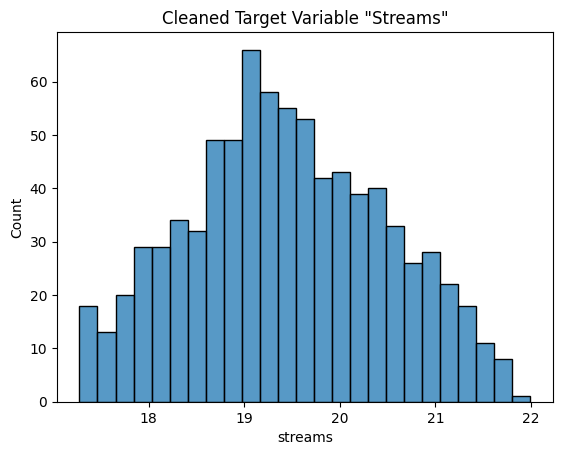

In [12]:
sns.histplot(data_non_null['streams'], bins=25).set_title('Cleaned Target Variable "Streams"')

# Feature selection

There are a couple steps which will be done all at once below:
- Create bins for continuous target variable, this will allow us to use logistic regression
- Create dummies for the categorical columns that we wish to keep
- Remove non-numeric columns that are not needed
- Reduce features that are not independent
    - Features such as chart ratings and playlist counts cannot be influenced prior to releasing a song, and therefore will  be left out of the model. This ties back to the main goal of this model, which is to statistically create songs that are more likely to have more streams than average
- Use standard scaler to scale the features

In [13]:
# lets create a new target feature to test model
data_non_null['streams_bin'] = pd.cut(data_non_null['streams'], 2, labels=('low','high'))

# we can make dummies for some of these columns
data_non_null = pd.concat(
    (data_non_null.drop(columns=['key','mode']),
     pd.get_dummies(data_non_null[['key', 'mode']], drop_first=True, dtype='int')), axis=1)

# need only numeric columns for regression, so lets separate
clean_numeric = data_non_null.select_dtypes(include='number')

# lets reduce to features that describe the song
# for example, if we want to create a new song, we cannot decide if it will be in playlists or in charts
descriptive = [
    'released_month',
    'released_day',
    'bpm',
    'danceability_%',
    'valence_%',
    'energy_%',
    'acousticness_%',
    'instrumentalness_%',
    'liveness_%',
    'speechiness_%',
    'key_A#',
    'key_B',
    'key_C#',
    'key_D',
    'key_D#',
    'key_E',
    'key_F',
    'key_F#',
    'key_G',
    'key_G#',
    'mode_Minor'
]
clean_numeric = clean_numeric[descriptive]


scaler = StandardScaler()
scaled_data = scaler.fit_transform(clean_numeric)
X = pd.DataFrame(scaled_data, columns=clean_numeric.columns)

# Model selection
Time to test some models! Starting with classification problems.

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score
X = clean_numeric
y_cat = data_non_null['streams_bin']
y_cont = data_non_null['streams']

In [15]:
def get_max_coef(model_instance, classifier=True):
    """Return coefficient with highest positive or negative correlation

    Args:
        model_instance (sklearn model instance): a fitted estimator from sklearn
        classifier (boolean): True if sklearn instance is a classifier model

    Returns:
        tuple: returns the feature name and corresponding coefficient value
    """
    num_features = np.shape(model_instance.coef_)[classifier]
    coef = pd.Series(
        data=(model_instance.coef_).reshape(num_features,),
        index=model_instance.feature_names_in_).sort_values(ascending=False)
    return (abs(coef).idxmax(), coef[abs(coef).idxmax()])

In [16]:
from sklearn import linear_model

X_train, X_test, y_train, y_test = train_test_split(X, y_cat)

logr = linear_model.LogisticRegression(max_iter=(10000))
logr.fit(X_train, y_train)

print('Logistic Regression')
print(f'accuracy score: {logr.score(X_test, y_test):.2f}')
idx, amt = get_max_coef(logr)
print(
    'Top coefficient value\n',
    idx, amt
)

ridc = linear_model.RidgeClassifier()
ridc.fit(X_train, y_train)

print('\nRidge Classifier')
print(f'accuracy score: {ridc.score(X_test, y_test):.2f}')
idx, amt = get_max_coef(ridc)
print(
    'Top coefficient value\n',
    idx, amt
)

sgdc = linear_model.SGDClassifier()
sgdc.fit(X_train, y_train)

print('\nSGD Classifier')
print(f'accuracy score: {sgdc.score(X_test, y_test):.2f}')
idx, amt = get_max_coef(sgdc)
print(
    'Top coefficient value\n',
    idx, amt
)

from sklearn import neighbors

knnc = neighbors.KNeighborsClassifier()
knnc.fit(X_train, y_train)

print('\nK Neighbors Classifier')
print(f'accuracy score: {knnc.score(X_test, y_test):.2f}')

from sklearn import tree

dt = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=4)
dt.fit(X_train, y_train)

print('\nDecision Tree Classifier')
print(f'accuracy score: {dt.score(X_test, y_test):.2f}')

from sklearn import ensemble

rf = ensemble.RandomForestClassifier()
rf.fit(X_train, y_train)

print('\nRandom Forest Classifier')
print(f'accuracy score: {rf.score(X_test, y_test):.2f}')

gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X_train, y_train)

print('\nGradient Boosting Classifier')
print(f'accuracy score: {gbc.score(X_test, y_test):.2f}')

from sklearn import svm

svmc = svm.SVC()
svmc.fit(X_train, y_train)

print('\nSVM Classifier')
print(f'accuracy score: {svmc.score(X_test, y_test):.2f}')

Logistic Regression
accuracy score: 0.60
Top coefficient value
 key_A# -0.6993077741659691

Ridge Classifier
accuracy score: 0.60
Top coefficient value
 key_A# -0.4208615185066132

SGD Classifier
accuracy score: 0.66
Top coefficient value
 key_C# -101.44194670466887

K Neighbors Classifier
accuracy score: 0.59

Decision Tree Classifier
accuracy score: 0.64

Random Forest Classifier
accuracy score: 0.63

Gradient Boosting Classifier
accuracy score: 0.63

SVM Classifier
accuracy score: 0.65


### Random Forest Classifier shows the best performance.

## Now regressors


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cont)

linr = linear_model.LinearRegression()
linr.fit(X_train, y_train)

print('\nLinear Regression')
print(f'accuracy score: {linr.score(X_test, y_test):.2f}')
idx, amt = get_max_coef(linr, classifier=False)
print(
    'Top coefficient value\n',
    idx, amt
)

ridr = linear_model.Ridge()
ridr.fit(X_train, y_train)

print('\nRidge Regression')
print(f'accuracy score: {ridr.score(X_test, y_test):.2f}')
idx, amt = get_max_coef(ridr, classifier=False)
print(
    'Top coefficient value\n',
    idx, amt
)

sgdr = linear_model.SGDRegressor()
sgdr.fit(X_train, y_train)

print('\nSGD Regression')
print(f'accuracy score: {sgdr.score(X_test, y_test):.2f}')
idx, amt = get_max_coef(sgdr, classifier=False)
print(
    'Top coefficient value\n',
    idx, amt
)


knnr = neighbors.KNeighborsRegressor()
knnr.fit(X_train, y_train)

print('\nK Neighbors Regression')
print(f'accuracy score: {knnr.score(X_test, y_test):.2f}')


dtr = tree.DecisionTreeRegressor(
    max_depth=4)
dtr.fit(X_train, y_train)

print('\nDecision Tree Regression')
print(f'accuracy score: {dtr.score(X_test, y_test):.2f}')


rfr = ensemble.RandomForestRegressor(
    max_depth=4)
rfr.fit(X_train, y_train)

print('\nRandom Forest Regression')
print(f'accuracy score: {rfr.score(X_test, y_test):.2f}')

gbr = ensemble.GradientBoostingRegressor(
    n_estimators=1000,
    max_depth=2
)
gbr.fit(X_train, y_train)

print('\nGradient Boosting Regression')
print(f'accuracy score: {gbr.score(X_test, y_test):.2f}')


svmr = svm.SVR()
svmr.fit(X_train, y_train)

print('\nSVM Regression')
print(f'accuracy score: {svmr.score(X_test, y_test):.2f}')


Linear Regression
accuracy score: 0.00
Top coefficient value
 key_D# 0.43118491119927066

Ridge Regression
accuracy score: 0.00
Top coefficient value
 key_D# 0.3749860690779574

SGD Regression
accuracy score: -68873012543681979379351552.00
Top coefficient value
 key_D -98177505518.56024

K Neighbors Regression
accuracy score: -0.17

Decision Tree Regression
accuracy score: 0.02

Random Forest Regression
accuracy score: 0.14

Gradient Boosting Regression
accuracy score: -0.04

SVM Regression
accuracy score: 0.00


### All quite bad. Lets proceed with a classification model.

In [18]:
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y_cat)

rf = ensemble.RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
confusion = confusion_matrix(y_test, y_pred, labels=['low', 'high'])
print('Confusion Matrix')
print(confusion)

# High in False positives

Confusion Matrix
[[95 26]
 [52 31]]


In [19]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, target_names=['low', 'high'])
print(report)

              precision    recall  f1-score   support

         low       0.54      0.37      0.44        83
        high       0.65      0.79      0.71       121

    accuracy                           0.62       204
   macro avg       0.60      0.58      0.58       204
weighted avg       0.60      0.62      0.60       204



### Lets perform some parameter tuning to attempt to reduce the false positives.
### We can begin with randomized search

In [20]:
from sklearn.model_selection import RandomizedSearchCV
# first we do a big search to see what the best parameters may be

# number of trees in the forest
n_estimators = [int(x) for x in np.linspace(10, 2000, 30)]

# criterion function used to measure the quality of a split
criterion = ['gini', 'entropy', 'log_loss']

# maximum depth per tree
max_depth = [int(x) for x in np.linspace(1, 30, 10)]
max_depth.append(None)

# minimum samples required to split a node
min_samples_split = [int(x) for x in np.linspace(2, 30, 10)]

# minimum number of samples at each leaf
min_samples_leaf = [x for x in range(1, 10)]

# features to consider at every split
max_features = ['sqrt', 'log2', None]

# method of selecting samples
bootstrap = [True, False]

# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'criterion': criterion,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_features': max_features,
    'bootstrap': bootstrap
    }

In [21]:
rf = ensemble.RandomForestClassifier()
rfcv = RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_grid,
    n_iter=100,
    cv=3,
    verbose=2,
    n_jobs=-1)

rfcv.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 4, 7, 10, 13, 17, 20,
                                                      23, 26, 30, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [2, 5, 8, 11, 14,
                                                              17, 20, 23, 26,
                                                              30],
                                        'n_estimators': [10, 78, 147, 215, 284,
                                                         353, 421, 490, 558,
                                                         627, 696, 764, 833,
                                                         902, 970, 1039, 1107,
                                                         1176, 1245, 1313, 1382,
                                                         1451, 1519, 1588, 1656,
                                                         1725, 1794, 1862, 1931,
                                                         2000]},
                   verbose=2)

In [22]:
rfcv.best_params_

{'n_estimators': 696,
 'min_samples_split': 30,
 'min_samples_leaf': 5,
 'max_features': None,
 'max_depth': 1,
 'criterion': 'gini',
 'bootstrap': False}

With these values we can begin a more focused grid search

In [23]:
from sklearn.model_selection import GridSearchCV
# create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [1400, 1500, 1600, 5000],
    'min_samples_split': [15, 17, 19],
    'min_samples_leaf': [4, 6, 8],
    'max_features': [None, 1, 2],
    'max_depth': [3, 5, 7, 9],
    'bootstrap': [True]    
}

rf = ensemble.RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid, 
    cv=3,
    n_jobs=-1,
    verbose=2)

In [24]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [3, 5, 7, 9],
                         'max_features': [None, 1, 2],
                         'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [15, 17, 19],
                         'n_estimators': [1400, 1500, 1600, 5000]},
             verbose=2)

In [25]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 9,
 'max_features': 2,
 'min_samples_leaf': 8,
 'min_samples_split': 17,
 'n_estimators': 5000}

In [26]:
rf = ensemble.RandomForestClassifier(**grid_search.best_params_)
rf_original = ensemble.RandomForestClassifier()

rf.fit(X_train, y_train)
rf_original.fit(X_train, y_train)

print('\nRandom Forest Classifier')
print(f'new accuracy score: {rf.score(X_test, y_test):.2f}')
print(f'original accuracy score: {rf_original.score(X_test, y_test):.2f}')

y_pred = rf.predict(X_test)
y_pred_original = rf_original.predict(X_test)
confusion = confusion_matrix(y_test, y_pred, labels=['low', 'high'])
print('new confusion Matrix')
print(confusion)
confusion = confusion_matrix(y_test, y_pred_original, labels=['low', 'high'])
print('original confusion Matrix')
print(confusion)


Random Forest Classifier
new accuracy score: 0.63
original accuracy score: 0.60
new confusion Matrix
[[113   8]
 [ 68  15]]
original confusion Matrix
[[95 26]
 [55 28]]


False positives were reduced after parameter tuning.  
In the scenario where we are creating music in hopes of higher streams, then it is reasonable to say that a false positive is more costly than a false negative.  
Even though the error remained similar, the reduction of false negatives was a huge improvement.